In [2]:
from google.colab import drive
drive.mount('/content/drive') # remove the cell if colab is not used

Mounted at /content/drive


In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
base_path = Path('/content/drive/MyDrive/GCollab/') # Pass path to data folder here, e.g. Path('/content/drive/MyDrive/data') if using Google Drive

# Analiza i przetwarzanie danych na temat Titanica

#### Wyobraź sobie, że pewnego wakacyjnego dnia, będąc na plaży w pełnym słońcu, odbierasz telefon od nieznanego numeru.
Robisz to niechętnie — zasłużyłeś/aś przecież na odpoczynek i chcesz mieć ten czas tylko dla siebie. Już masz na końcu języka wymijającą odpowiedź, gdy nagle z drugiej strony słyszysz:
„Czy jesteś gotowy, by tego lata rozwikłać jedną z największych zagadek ludzkości?”

Jako osoba z natury ciekawa świata i ze świetnym umysłem analitycznym, szybko zapominasz o plaży i wakacjach. Zaintrygowany/a dopytujesz o szczegóły, ale rozmówca nie chce zdradzić zbyt wiele. Wiadomo jedynie, że chodzi o *zatonięcie Titanica w 1914* roku, a celem misji jest ustalenie, które osoby miały szansę przeżyć.

**Ty** — jako **renomowany analityk danych** — byłeś/byłaś ich pierwszym wyborem do analizy i oczyszczenia danych. Mimo wątpliwości postanawiasz podjąć się zadania, mając nadzieję, że twoja wiedza może zostać praktycznie wykorzystana w słusznym celu.

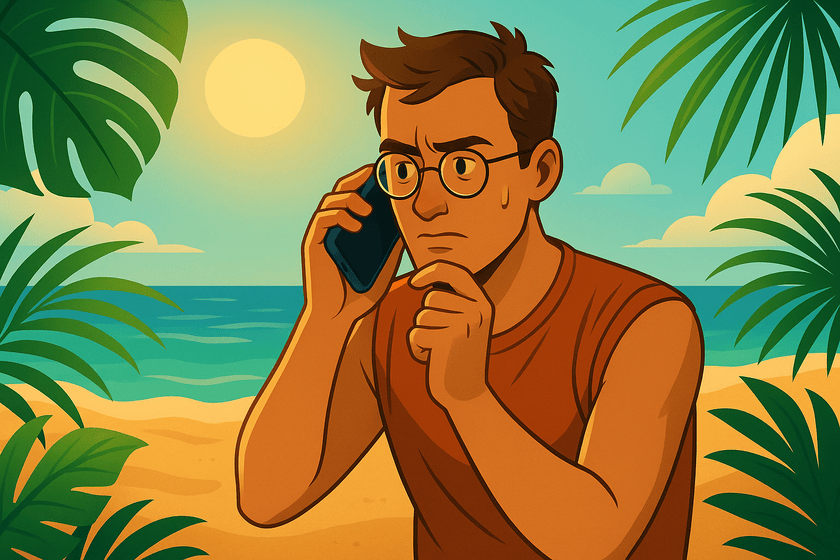

(*AI-generated image*)


#### Twoim celem będzie przeanalizowanie i przetworzenie zbioru danych w taki sposób, by mógł on być użyty do nauki modelu do klasyfikacji każdego pasażera Titanica jako ofiary (0) lub osoby, która przeżyła (1).

(Uwaga: w tym zadaniu nie będziesz trenować modeli, ta przyjemność spotka cię w następnych notebookach)

Poniżej znajdziesz pytania, które mogą być pomocne w analizie, oraz odwołania do poszczególnych sekcji z notebooka do lekcji:

- Czy wszystkie kolumny są istotne w kontekście zadania?
- Czy występują brakujące wartości? Jeśli tak, to jak je uzupełnisz? (sekcja #2.1)
- Czy typy danych są odpowiednie do znaczenia kolumny? (sekcja #1.3)
- Czy dystrybucje danych mają rozkłady normalne, czy asymetryczne? (sekcja #4.1 + wykład)
- Która zmienna oznacza predykowaną klasę?
- Jaki jest rozkład zmiennej predykowanej względem zmiennych kategorialnych, jak i numerycznych? (sekcja #4.1)
- Czy końcowe rozkłady zawierają wartości skrajne? (sekcja #4.2 + wykład)

Wymagania:

- Zbiór musi być oczyszczony, tj. finalnie nie powinien mieć brakujących wartości (sekcja #2.1)
- Zbiór musi zawierać co najmniej dwie dodatkowe kolumny, które mogą wzbogacić informacje zawarte w zbiorze (sekcje #1.5 i #2.2)
- Cechy kategorialne powinny być zakodowane, postaraj się dobrać odpowiedni sposób (sekcja #2.3)
- Zbadaj, czy występują skrajne wartości (outliery) zarówno dla wartości numerycznych, jak i dla kategorialnych
- Każda cecha powinna być zwizualizowana co najmniej raz. Sam(a) zastanów się, czy warto wizualizować cechy parami w celu odkrycia zależności między nimi (sekcja #4.4)
- Nie ma ograniczenia na liczbę komórek, ale zastanów się, czy dana wizualizacja/obliczenie jest przydatne w całej analizie, czy po prostu sobie "egzystuje" bez żadnych wniosków

Zadbaj o czytelność kodu i nazewnictwo zmiennych. Jeśli jakiś wycinek kodu się powtarza, to wyodrębnij go do funkcji. Postaraj się zamieszczać swoje wnioski w postaci komentarza `Markdown`.

Poniżej zamieszczamy tabelę z wyjaśnieniem poszczególnych kolumn:

| Kolumna      | Opis                                                                            |
| ------------ | ------------------------------------------------------------------------------- |
| **Survived** | Czy pasażer przeżył (0 = nie, 1 = tak).                                         |
| **Pclass**   | Klasa podróży (1 = I klasa, 2 = II klasa, 3 = III klasa).                       |
| **Name**     | Imię i nazwisko pasażera.                                                       |
| **Sex**      | Płeć pasażera (male = mężczyzna, female = kobieta).                             |
| **Age**      | Wiek pasażera w latach.                                                         |
| **SibSp**    | Liczba rodzeństwa i małżonków na pokładzie.                                     |
| **Parch**    | Liczba rodziców i dzieci na pokładzie.                                          |
| **Ticket**   | Numer biletu.                                                                   |
| **Fare**     | Cena biletu.                                                                    |
| **Cabin**    | Numer kabiny pasażera                                     |
| **Embarked** | Port, w którym pasażer wsiadł (C = Cherbourg, Q = Queenstown, S = Southampton). |
                                                         |


In [20]:
titanic_df = pd.read_csv(base_path / 'titanic.csv', index_col='PassengerId')

In [45]:
titanic_df[10:20]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeCategory,FamilySize
PassengerId,,,,,,,,,,
11,1,3,1,4.0,1,1,8.0,0,Child,2
12,1,1,1,58.0,0,0,27.0,0,Older Adult,0
13,0,3,0,20.0,0,0,8.0,0,Young Adult,0
14,0,3,0,39.0,1,5,31.0,0,Young Adult,6
15,0,3,1,14.0,0,0,8.0,0,Teen,0
16,1,2,1,55.0,0,0,16.0,0,Older Adult,0
17,0,3,0,2.0,4,1,29.0,2,Toddler,5
18,1,2,0,3.0,0,0,13.0,0,Toddler,0
19,0,3,1,31.0,1,0,18.0,0,Young Adult,1


In [22]:
titanic_df.tail(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [7]:
titanic_df.dtypes

,0
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64
Cabin,object


In [23]:
def get_percentage_missing(df, vaxis):
  """
    Zwraca procent brakujących wartości (NaN) w wierszach lub kolumnach DataFrame.

    df : pandas.DataFrame
        Tabela danych, dla której liczone są braki.

    axis : int
        Oś, względem której obliczane są braki:
        - 0 : procent braków w każdej kolumnie
        - 1 : procent braków w każdym wierszu

  """
  missing_rows = df.isna().sum(axis=vaxis)                                #zmienna, która przechowuje dataFrime poddany obróbce: isna() - True w komorce tam, gdzie brak danej; sum(axis=vaxis) = suma wartosci true po axis=0 wierszach, axis=1 kolumnach
  missing_rows_perc = np.round(missing_rows / df.shape[vaxis] * 100, 2)   #df.shape[vaxis] -> zwraca wymiar dataFrame
  return missing_rows_perc[missing_rows_perc > 0]

In [24]:
print(get_percentage_missing(titanic_df, 0), end="\n\n")
#print(get_percentage_missing(titanic_df, 1))


Age         19.87
Fare        11.00
Cabin       77.10
Embarked     0.22
dtype: float64



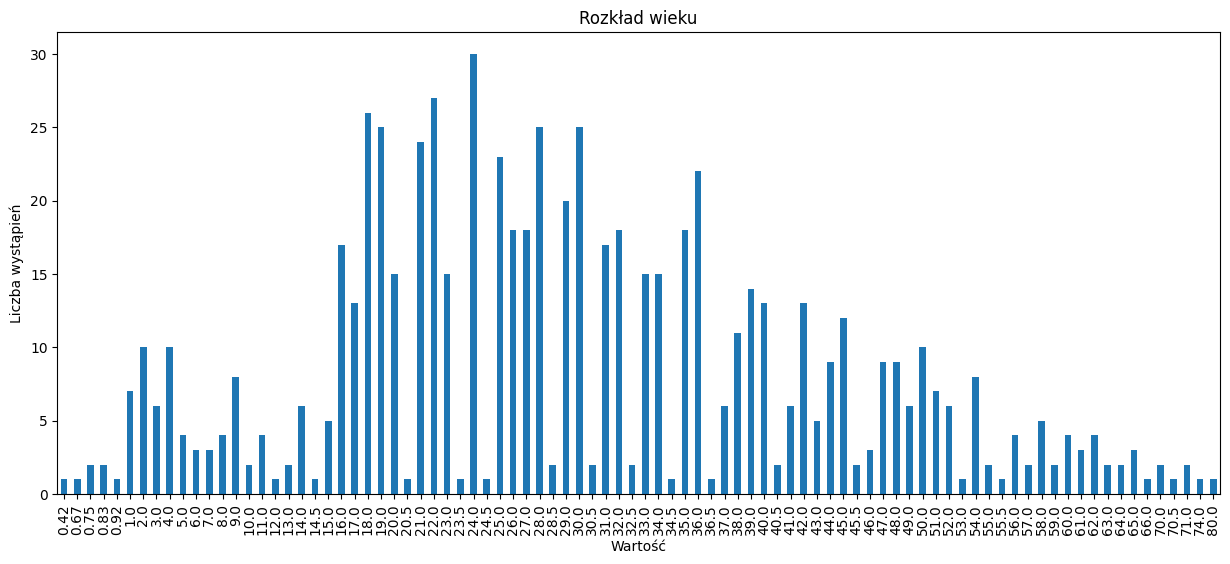

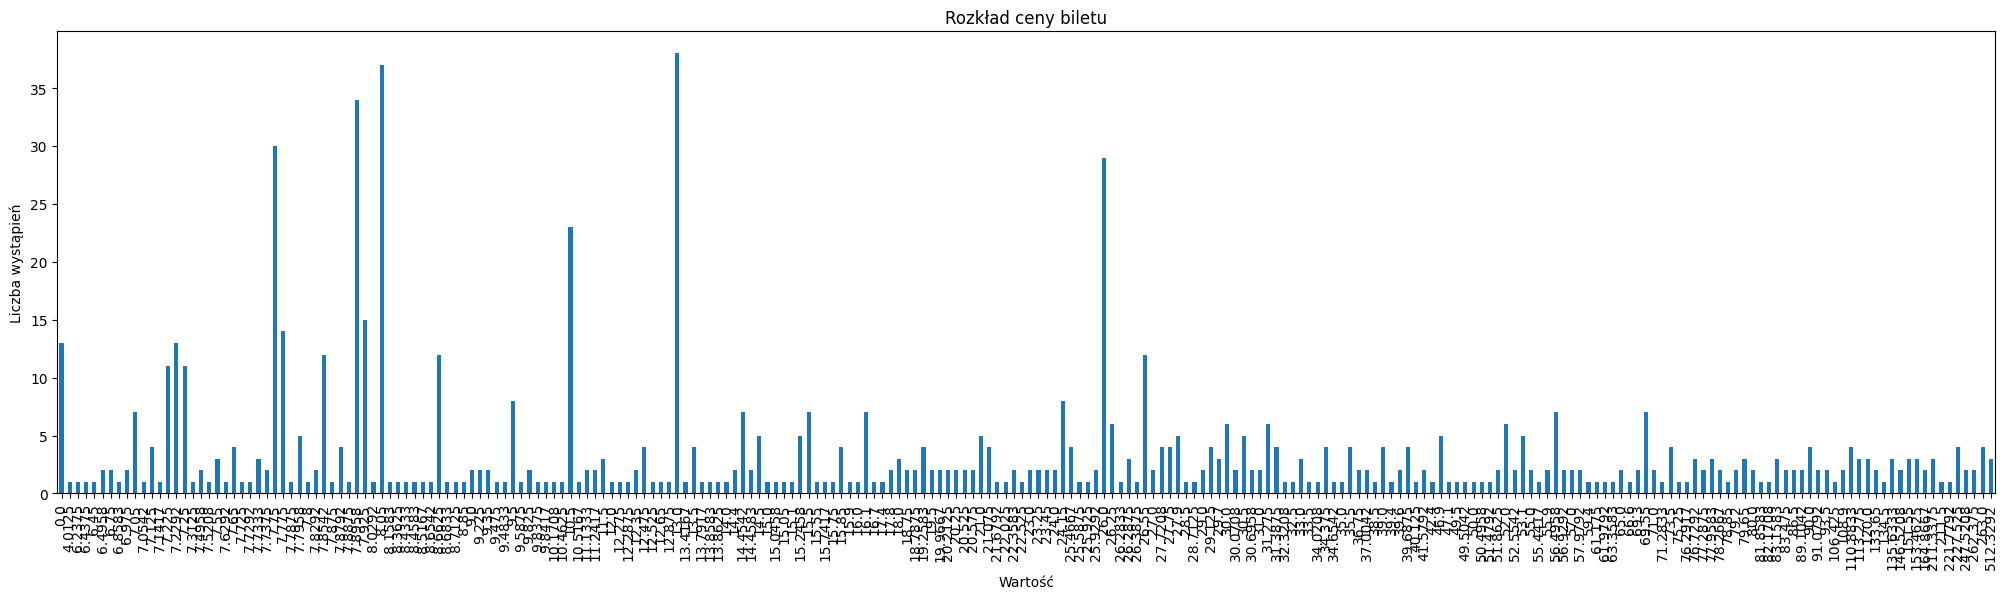

In [25]:
plt.figure(figsize=(15, 6))
titanic_df['Age'].value_counts().sort_index(ascending=True).plot(kind='bar')
plt.xlabel('Wartość')
plt.ylabel('Liczba wystąpień')
plt.title('Rozkład wieku')
plt.show()

plt.figure(figsize=(25, 6))
titanic_df['Fare'].value_counts().sort_index(ascending=True).plot(kind='bar')
plt.xlabel('Wartość')
plt.ylabel('Liczba wystąpień')
plt.title('Rozkład ceny biletu')

plt.show()

Uzupełnienie braków

In [26]:
def get_column_distribution(df, column):
  return df[column].value_counts(normalize=True)

In [27]:
age_count_prob = get_column_distribution(titanic_df, 'Age')                                                #wiek wydaje się na pozór niezależny (dlatego uzupełniam dane zgodnie z rozkładem wieku przed uzupelnieniem), jednak tak naprawdę wiek to jedna z cech zależnych (w przypadku przetrwania)
age_values = age_count_prob.index
age_probs = age_count_prob.values

missing_age_vals = titanic_df.Age.isna()
titanic_df.loc[missing_age_vals, 'Age'] = np.random.choice(age_values, size=missing_age_vals.sum(), p=age_probs)

In [28]:
titanic_df['Fare'].fillna(titanic_df.groupby('Pclass')['Fare'].transform('median'), inplace=True)               #cena biletu na pewno zalezy od klasy podrozniczej, nie można wykorzystać średniej, bo zakłamie stan rzeczywisty
                                                                                                                #co z tego, że średnia wynosi X skoro niewiele osób wykupiło w tej cenie bilet (innymi słowy jest rozkład asymetryczny to nie można, gdyby to był rozkład Gaussa to czemu nie), mediana bardziej obrazuje rzeczywistość danych wejściowych

/tmp/ipython-input-4146637183.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df['Fare'].fillna(titanic_df.groupby('Pclass')['Fare'].transform('median'), inplace=True)               #cena biletu na pewno zalezy od klasy podrozniczej, nie można wykorzystać średniej, bo zakłamie stan rzeczywisty


In [29]:
titanic_df['Cabin'].fillna('U', inplace=True)                                                      #numer kabiny i port w zasadzie niewiele mówią, nie są zależne z innymi cechami, można je wypełnić czymkolwiek albo po prostu stworzyc nową kategorie,
titanic_df['Embarked'].fillna('X', inplace=True)

/tmp/ipython-input-688899807.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df['Cabin'].fillna('U', inplace=True)                                                      #numer kabiny i port w zasadzie niewiele mówią, nie są zależne z innymi cechami, można je wypełnić czymkolwiek albo po prostu stworzyc nową kategorie,
/tmp/ipython-input-688899807.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3

In [30]:
titanic_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.608126,0.523008,0.381594,31.756069
std,0.486592,0.836071,14.186389,1.102743,0.806057,49.325538
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,21.000000,0.000000,0.000000,8.050000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.000000
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.275000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [31]:
titanic_df = titanic_df.convert_dtypes()
titanic_df.dtypes

,0
Survived,Int64
Pclass,Int64
Name,string[python]
Sex,string[python]
Age,Float64
SibSp,Int64
Parch,Int64
Ticket,string[python]
Fare,Float64
Cabin,string[python]


Dodanie nowych kolumn

In [32]:
def categorize_age(age):
    if age < 1:
        return 'Baby'
    elif 1 <= age <= 3:
        return 'Toddler'
    elif 4 <= age <= 9:
        return 'Child'
    elif 10 <= age <= 13:
        return 'Tween'
    elif 14 <= age <= 19:
        return 'Teen'
    elif 20 <= age <= 39:
        return 'Young Adult'
    elif 40 <= age <= 59:
        return 'Older Adult'
    elif 60 <= age <= 79:
        return 'Senior'
    elif 80 <= age <= 99:
        return 'Elderly'
    else:
        return 'Centenarian'

In [33]:
titanic_df['AgeCategory'] = titanic_df['Age'].apply(categorize_age)  #kategoria wieku, być może pożyteczna przy estetyce wizualizacji danych

In [34]:
titanic_df['FamilySize'] = titanic_df['SibSp'] + titanic_df['Parch']                 #całościowy rozmiar rodziny, rozmiar rodziny podzielony na 2 kolumny jest redundantny

Obróbka danych

In [36]:
titanic_df = titanic_df.drop('Name', axis=1)                         #zbedna kolumna w analizie danych, zmniejszymy rozmiar pliku csv, umożliwimy potencjalnemu lmm'owi analize danych
titanic_df = titanic_df.drop('Cabin', axis=1)                        #to też w zasadzie, bo pierwotnie baza danych w kontekście kolumny Cabin jest dziurawa jak ser szwajcarski => llm na podstawie tej kolumny nie stwierdzi, czy dany człowiek przetrwa; uzupełnianie braków kolumny Cabin pozostawię dla siebie
titanic_df = titanic_df.drop('Ticket', axis=1)                       #jak wyżej, niektóre bilety posiadają dodatkowe oznaczenie, które wiążą się z kolumną port => redundantna dana

In [37]:
titanic_df['Sex'] = titanic_df.Sex.map({
    'male': 0,
    'female': 1
})
titanic_df['Sex'].value_counts()                                     #kodowanie binarne płci

,count
Sex,
0,577
1,314


In [38]:
Embarked_label = titanic_df.Embarked.unique()

labels_mapping = {
    k: i for i, k in enumerate(Embarked_label.tolist())
}

titanic_df['Embarked'] = titanic_df.Embarked.apply(lambda x: labels_mapping[x])           #kodowanie skrótu portu; dzięki czemu dataset będzie użyteczny i dla llm (akurat ta kolummna jest nieprzydatna), i pod statystykę

In [44]:
titanic_df['Fare'] = titanic_df['Fare'].round(0)                       #redukcja mało znaczących cyfr po przecinku

Badanie outlierów (wstępnie zbadałem je na początku za pomocą wykresów)



In [ ]:
titanic_df.Age.value_counts()

In [ ]:
filtered_df = titanic_df[
    (titanic_df['Age'] < 1) |
    (titanic_df['Age'] >= 80) |
    (titanic_df['Fare'] < 6.23) |
    (titanic_df['Fare'] > 500)
]

print(filtered_df)

In [55]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

In [56]:
numerical_cols = ['Age', 'Fare']

In [64]:
for col in numerical_cols:
    outliers, lower, upper = detect_outliers_iqr(titanic_df, col)
    outliers_percent = round((len(outliers)/len(titanic_df)*100),2)
    print(f"{col}: {len(outliers)} outlierów ({outliers_percent}%)")
    print(f"Zakres: {lower} - {upper}")

    """
    1) może być część wspólna, więc niekoniecznie suma outlierów wyniesie 15+105
    2) użyłem standardowe wykrywanie outlierów z prezentacji, dlatego wyszło aż 105 w przypadku ceny biletu; jest to aż 10% danych, dlatego należałoby 1.5 * IQR zmienić na 2-3 * IQR
    """

Age: 15 outlierów (1.68%)
Zakres: -4.5 - 63.5
Fare: 105 outlierów (11.78%)
Zakres: -26.5 - 65.5


In [65]:
titanic_df[10:20]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeCategory,FamilySize
PassengerId,,,,,,,,,,
11,1,3,1,4.0,1,1,8.0,0,Child,2
12,1,1,1,58.0,0,0,27.0,0,Older Adult,0
13,0,3,0,20.0,0,0,8.0,0,Young Adult,0
14,0,3,0,39.0,1,5,31.0,0,Young Adult,6
15,0,3,1,14.0,0,0,8.0,0,Teen,0
16,1,2,1,55.0,0,0,16.0,0,Older Adult,0
17,0,3,0,2.0,4,1,29.0,2,Toddler,5
18,1,2,0,3.0,0,0,13.0,0,Toddler,0
19,0,3,1,31.0,1,0,18.0,0,Young Adult,1


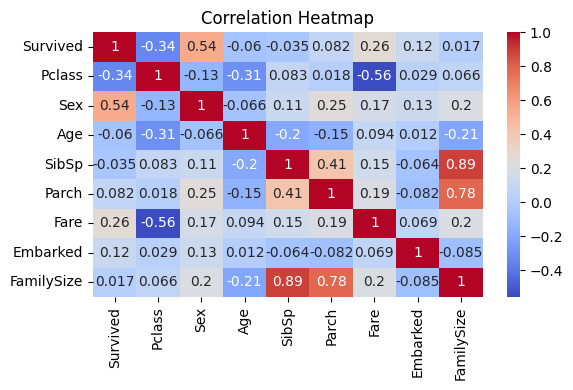

In [67]:
corr_matrix = titanic_df.corr(numeric_only=True)

plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Heatmap")
plt.tight_layout()
plt.show()

Płeć ma silną (+) korelację z przeżyciem (0.54) co oznacza, że kobiety miały większe szanse przeżycia niż mężczyźni.

Klasa biletu ma umiarkowanie (-) korelację z przeżyciem (-0.34). Z tego wynika, że pasażerowie z wyższej klasy (1 klasa) mieli większe szanse przeżycia, a z niższych nie.

Cena biletu ma (+) korelację z przeżyciem (0.26) – wyższe opłaty za bilet mogły wiązać się z lepszymi warunkami i większym prawdopodobieństwem przeżycia.

Klasa biletu i cena biletu mają ujemną korelację, co jest zgodne z logicznego punktu widzenia.

Generalnie im wyższa klasa, tym wyższa cena biletu, a co za tym idzie dogodniejsze warunki w kabinie, być może taka kabina znajdowała się bliżej łodzi ratunkowych.

Silna (+) korelacja SibSp i Parch z FamilySize jest oczywista, ponieważ dla danej osoby FamilySize = SibSp + Parch. Dzięki czemu wiadomo, że prawidłowo dodałem nową kolumnę danych.

Ujemna korelacja klasy podróżniczej, a płci sugeruje, że klase wyższą wybierali częściej mężczyźni.

Co ciekawe kolumna FamilySize ma niewielką korelację z innymi kolumnami. Sądziłem, że będzie miała wyższe wartości np. negatywną korelację z przetrwaniem. Im większa rodzina na pokładzie, tym większy "chaos" i niższa szansa na przeżycie w porównaniu do osób pojedynczych/par.

Odpowiadając na ostatnie pytanie, zanim utworzyłem heatmapę to usunąłem z datasetu kolumny, które uznałem za zbędne np. imię i nazwisko, nazwa portu z którego wsiadł pasażer. Fakt, kolumnę z nazwą portu mogłem zostawić, natomiast bardziej zależało mi na dostowaniu danych pod potecjalny LLM, który mógły skupić się na bardziej przydatnych danych aniżeli nazwa portu. Dane (a prędzej korelacje), które są na heatmapie, ale ich nie opisałem, są również istotne. Słabe korelacje między danymi również są istotne, ponieważ pozwalają wykluczyć znaczną zależność między danymi kolumnami z datasetu.
